In [1]:


import os
import matlab.engine # the matlab engine for python
import cv2
import numpy as np
from pathlib import Path
from diffcurve.plot_utils import plot_images, remove_frame
import matplotlib.pyplot as plt
from diffcurve.fdct2d.curvelet_2d import get_curvelet_system
from diffcurve.utils import get_project_root
from diffcurve.fdct2d.numpy_frontend import numpy_fdct_2d, numpy_ifdct_2d
from diffcurve.fdct2d.numpy_frontend import perform_ifft2


## Sample image

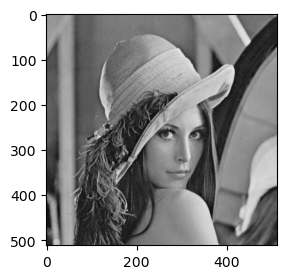

In [2]:

project_root = get_project_root()

lena_file = Path.joinpath(project_root, "tests/Lena.jpg")

lena_img = cv2.imread(str(lena_file), 0).astype(float) / 255

plt.figure(figsize = (3,3))
plt.imshow(lena_img, cmap = 'gray')

## Get the curvelet system

In [3]:

dct_kwargs = {
    'is_real': 0.0, # complex-valued curvelets
    'finest': 2.0, # use wavelets at the finest level
    'nbscales': 6.0,
    'nbangles_coarse': 16.0}


curvelet_system, curvelet_coeff_dim = get_curvelet_system(lena_img.shape[0],
                                                          lena_img.shape[1],
                                                          dct_kwargs)

curvelet_support_size =  np.prod(np.array(curvelet_coeff_dim), 1)

## Show a curvelet

Text(0.5, 1.0, 'spatial')

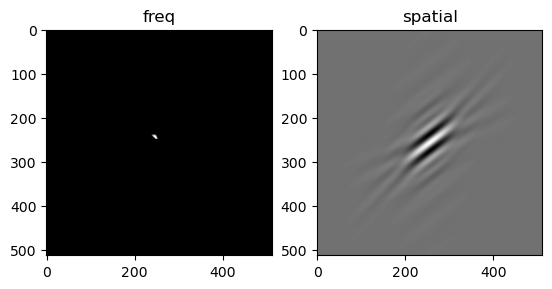

In [4]:
curvelet_idx = 1
fig, axes = plt.subplots(1, 2)


axes[0].imshow( (curvelet_system[curvelet_idx]).real, cmap='gray')
axes[0].set_title('freq')

axes[1].imshow( perform_ifft2(curvelet_system[curvelet_idx]).real, cmap='gray')
axes[1].set_title('spatial')

## Run the curvelet transform and its inverse

In [5]:
coeff = numpy_fdct_2d(lena_img, curvelet_system)

decomp = numpy_ifdct_2d(coeff, curvelet_system, curvelet_support_size )



## Show some curvelet coeffs

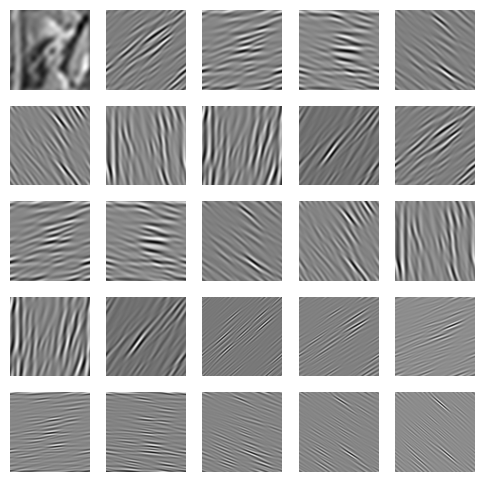

In [6]:
num_curvelets_to_show = 25


curvelets_coeff_to_show = [
    coeff[curvelet_idx].real.T for curvelet_idx in range(num_curvelets_to_show) ]


im, axes = plot_images(curvelets_coeff_to_show, nrows = 5, ncols = 5,
                       vrange = 'individual', cbar='none', cmap='gray',
                       fig_size = (6, 6))

[remove_frame(ax) for ax in axes.flatten()];

## Show some weighted curvelets

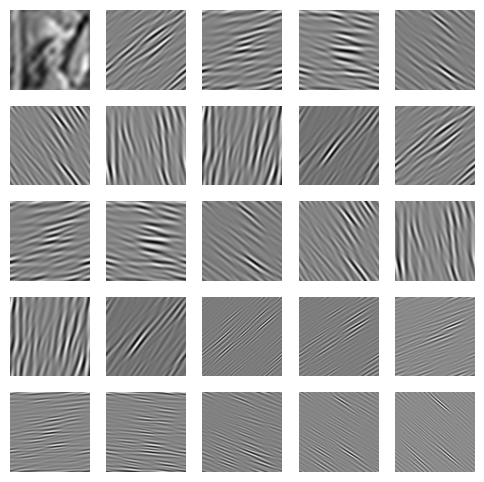

In [7]:

num_curvelets_to_show = 25

weighted_curvelets_to_show = [
    decomp[curvelet_idx].real.T for curvelet_idx in range(num_curvelets_to_show) ]


im, axes = plot_images(weighted_curvelets_to_show, nrows = 5, ncols = 5,
                       vrange = 'individual', cbar='none', cmap='gray',
                       fig_size = (6, 6))

[remove_frame(ax) for ax in axes.flatten()];

## Show the reconstructed image

MSE = 5.448402320331688e-31


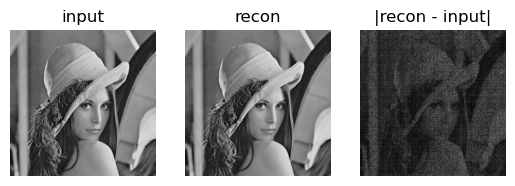

In [8]:
fig, axes = plt.subplots(1, 3)

axes[0].imshow(lena_img , cmap='gray' )
axes[0].set_title('input')

axes[1].imshow( decomp.sum(0).real, cmap='gray' )
axes[1].set_title('recon')

mse = np.mean( (decomp.sum(0).real - lena_img) ** 2 )
axes[2].imshow( np.abs(decomp.sum(0).real - lena_img), cmap='gray' )
axes[2].set_title(f'|recon - input|')

print(f'MSE = { mse}')

[remove_frame(ax) for ax in axes.flatten()];